In [1]:
import pandas as pd
df = pd.read_csv("c:/data/customer/customer.csv")
df.head()

,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
0,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [2]:
train_cols = df.columns[:-1]
X = df[train_cols]
y = df["Churn"]

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
stratify=y, random_state=0)

In [4]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
# 가지치기 경로 정보
path = clf.cost_complexity_pruning_path(X_train, y_train)
#print(path)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas) # 값이 크면 제거된 노드수가 증가 (가지치기 양을 조정하는 옵션)
print(impurities) # 노드의 불순도

[0.         0.00019908 0.00026042 0.00026445 0.00026491 0.00026538
 0.00031594 0.00037412 0.00038015 0.00038015 0.00038015 0.00038015
 0.00038197 0.00038197 0.00038768 0.00039094 0.00039295 0.00039309
 0.00039444 0.00039693 0.00039873 0.00039913 0.00040016 0.00040016
 0.00047358 0.00050914 0.00051515 0.00051849 0.00052346 0.00053355
 0.00053355 0.00053355 0.00060024 0.00060977 0.00060977 0.00066693
 0.00066693 0.00067847 0.0007114  0.00072029 0.00073343 0.0007503
 0.00075493 0.00076281 0.00076666 0.00076954 0.00077809 0.00078116
 0.0008161  0.00090036 0.00096038 0.00097442 0.00103476 0.00105485
 0.00131228 0.00169012 0.00186842 0.00205094 0.00216086 0.00219508
 0.00250862 0.00304989 0.00310298 0.00373953 0.00418187 0.00745216
 0.0078461  0.00952263 0.01230072 0.01620748 0.02223509 0.02556861]
[0.         0.00079632 0.00157758 0.00237094 0.00316567 0.0039618
 0.00554151 0.00628975 0.00705005 0.00857066 0.00933097 0.01009127
 0.01085521 0.01161915 0.01239452 0.01317639 0.01474819 0.01632

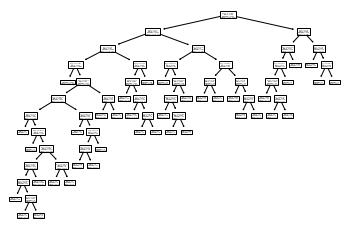

In [7]:
import matplotlib.pyplot as plt
from sklearn import tree
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.0008)
clf.fit(X_train, y_train)
plt.Figure(figsize=(10,5))
tree.plot_tree(clf)
plt.show()

Text(0, 0.5, 'impurities')

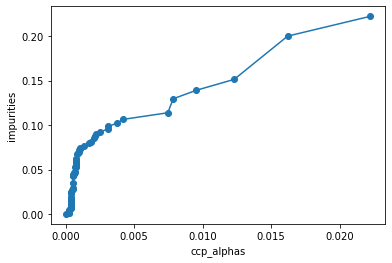

In [8]:
import matplotlib.pyplot as plt
# fig, ax = plt.subplots()
plt.plot(ccp_alphas[:-1], impurities[:-1], marker='o')
plt.xlabel("ccp_alphas")
plt.ylabel("impurities")
# ccp_alpha가 증가하면 가지치기된 노드수 증가 => 불순도가 증가함
# ccp_alpha가 감소하면 가지치기된 노드수 감소 => 불순도가 감소함

In [9]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0,
    ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

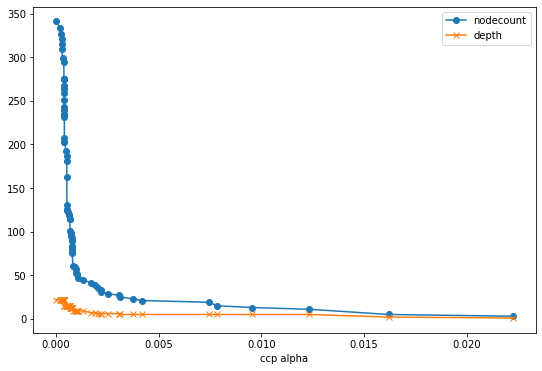

In [10]:
# 마지막 값은 전체 트리를 가지치기하여 하나의 노드로 트리를 남기는 알파값이므로 제외하고 출력
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(9,6))
plt.plot(ccp_alphas, node_counts, marker='o', label='nodecount')
plt.plot(ccp_alphas, depth, marker='x', label='depth')
plt.xlabel("ccp alpha")
plt.legend()
plt.show()
#ccp alpha가 증가하면 노드 갯수가 감소한다. (가지치기를 많이 하는 옵션)

 최고 정확도 : 0.9616306954436451
 최적의 alpha: 0.0008161045299304866


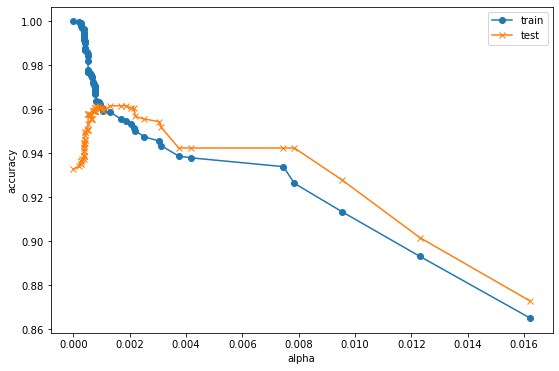

In [ ]:
import numpy as np
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]
m=max(test_scores)
i=np.argmax(test_scores)
print(' 최고 정확도 :',m) 
print(' 최적의 alpha:',ccp_alphas[i])
plt.figure(figsize=(9,6))
plt.xlabel("alpha")
plt.ylabel("accuracy")
plt.plot(ccp_alphas, train_scores, marker='o',
label="train")
plt.plot(ccp_alphas, test_scores, marker='x', label="test")
plt.legend()
#ccp_alpha가 0이면 과적합 문제 발생
#알파가 증가하면 가지치기가 진행되어 일반적인 트리가 됨